In [1]:
#경고 메세지 무시 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
!pip install mglearn

     |████████████████████████████████| 540 kB 4.0 MB/s 
  Created wheel for mglearn: filename=mglearn-0.1.9-py2.py3-none-any.whl size=582637 sha256=bb37f9fa19f039527573ad302c487a0100903ca52cd10db71f0e2c941ca9a317
  Stored in directory: /root/.cache/pip/wheels/f1/17/e1/1720d6dcd70187b6b6c3750cb3508798f2b1d57c9d3214b08b
Successfully built mglearn


#colab 에서 한글 텍스트 사용

In [3]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 40 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Selecting previously unselected package fonts-nanum.
(Reading database ... 148492 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [4]:
from sklearn.preprocessing import LabelEncoder

items = ['TV','냉장고','전자랜지','컴퓨터','선풍기','믹서']
encoder = LabelEncoder() #Labelencoder 의 객체를 생성 
encoder.fit(items) #레이블 적용을 위한 fit(items) 적용 

encoder.transform(items)
'''
array([0, 1, 4, 5, 3, 2])
이때 왜 0 1 2 3 4 5 순서가 아닌가?
labelencoder 의 label 적용은 tree 의 적용이랑 같다고 보면 된다.
'''

#적용 
print('인코딩 변환값: ',encoder.transform(items))
print('인코딩 클래스: ',encoder.classes_)
#decoding 인코딩으로 바꾼 레이블 값을 넣어 원본 의 문자열을 리턴 
print('인코딩 원본값: ',encoder.inverse_transform([5])) 


인코딩 변환값:  [0 1 4 5 3 2]
인코딩 클래스:  ['TV' '냉장고' '믹서' '선풍기' '전자랜지' '컴퓨터']
인코딩 원본값:  ['컴퓨터']


##원핫 인코딩


In [5]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np 

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#먼저 숫자 값으로 변환 왜? -> 문자열은 숫자형 특성이 없기 때문에 label encoding 을 먼저 해야 한다.

encoder = LabelEncoder()
encoder.fit(items)

labels = encoder.transform(items)
print(labels)

#원한 인코딩 적용은 2차원 데이터 로 해야 한다 
labels = labels.reshape(-1,1)
print(labels.shape)

#one hot encoding 적용 

encoder_oh = OneHotEncoder()
encoder_oh.fit(labels)

labels_oh  = encoder_oh.transform(labels)
print(labels_oh)
print(labels_oh.toarray())

[0 1 4 5 3 3 2 2]
(8, 1)
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 4)	1.0
  (3, 5)	1.0
  (4, 3)	1.0
  (5, 3)	1.0
  (6, 2)	1.0
  (7, 2)	1.0
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [6]:
##pandas 로 encoding 

import pandas as pd 

df = pd.DataFrame({'items':items}) #데이터 프레임으로 변환 
df

pd.get_dummies(df)

,items_TV,items_냉장고,items_믹서,items_선풍기,items_전자렌지,items_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


##원핫 인코딩 실습 1


In [7]:
import os 
import pandas as pd
import mglearn 

names= ['age', 'workclass', 'fnlwgt', 'education',  'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'gender',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country','income']

select_names = ['age', 'workclass', 'education', 'gender', 'hours-per-week', 'occupation', 'income']

df = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH,'adult.data'),header = None,index_col=False , names = names)

# 필요한 부분의 컬럼만 가져온다. 
df = df[select_names]
df.head()

,age,workclass,education,gender,hours-per-week,occupation,income
0,39,State-gov,Bachelors,Male,40,Adm-clerical,<=50K
1,50,Self-emp-not-inc,Bachelors,Male,13,Exec-managerial,<=50K
2,38,Private,HS-grad,Male,40,Handlers-cleaners,<=50K
3,53,Private,11th,Male,40,Handlers-cleaners,<=50K
4,28,Private,Bachelors,Female,40,Prof-specialty,<=50K


In [8]:
#결측치 없는지 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   gender          32561 non-null  object
 4   hours-per-week  32561 non-null  int64 
 5   occupation      32561 non-null  object
 6   income          32561 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.7+ MB


In [9]:
df[df['workclass'] == ' ?'].head() #직업을 알수 없는 데이터 


,age,workclass,education,gender,hours-per-week,occupation,income
27,54,?,Some-college,Male,60,?,>50K
61,32,?,7th-8th,Male,40,?,<=50K
69,25,?,Some-college,Male,40,?,<=50K
77,67,?,10th,Male,2,?,<=50K
106,17,?,10th,Female,32,?,<=50K


In [10]:
#원핫 인코딩 수행 

df_dummies = pd.get_dummies(df)
df_dummies.head().T

,0,1,2,3,4
age,39,50,38,53,28
hours-per-week,40,13,40,40,40
workclass_ ?,0,0,0,0,0
workclass_ Federal-gov,0,0,0,0,0
workclass_ Local-gov,0,0,0,0,0
workclass_ Never-worked,0,0,0,0,0
workclass_ Private,0,0,1,1,1
workclass_ Self-emp-inc,0,0,0,0,0
workclass_ Self-emp-not-inc,0,1,0,0,0
workclass_ State-gov,1,0,0,0,0


In [11]:
features = df_dummies.loc[:,'age':'occupation_ Transport-moving']
x = features.values
y = df_dummies['income_ <=50K'].values


In [12]:
#model 학습 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 0)
model = LogisticRegression().fit(train_x,train_y)
model.score(test_x,test_y)

0.8067804937968308

##숫자형 특성 원핫 인코딩 

In [13]:
df=  pd.DataFrame({'숫자특성':[0,1,2,1],'범주형특성':['양말','여우','양말','우산']})
df.info()

pd.get_dummies(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   숫자특성    4 non-null      int64 
 1   범주형특성   4 non-null      object
dtypes: int64(1), object(1)
memory usage: 192.0+ bytes


,숫자특성,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,0,1,0,0
1,1,0,1,0
2,2,1,0,0
3,1,0,0,1


In [14]:
df['숫자특성'] = df['숫자특성'].astype(str)
pd.get_dummies(df)

,숫자특성_0,숫자특성_1,숫자특성_2,범주형특성_양말,범주형특성_여우,범주형특성_우산
0,1,0,0,1,0,0
1,0,1,0,0,1,0
2,0,0,1,1,0,0
3,0,1,0,0,0,1


In [15]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()

train_x,test_x,train_y,test_y = train_test_split(cancer.data,cancer.target,random_state = 0)

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
#표준화 객체 생성
scaler = StandardScaler()
#train_x 를 scaler 적용
scaler.fit(train_x)

train_x_scaled = scaler.transform(train_x)
test_x_scaled = scaler.transform(test_x)


model_s = SVC(C=100).fit(train_x_scaled,train_y)
model_s.score(test_x_scaled,test_y)

0.958041958041958

In [17]:
import pandas as pd
df = pd.DataFrame(train_x_scaled)
print("특성들의 평균 값: \n", df.mean() )
print("특성들의 분산 값: \n", df.var() )

특성들의 평균 값: 
 0    -3.385138e-15
1    -1.095107e-15
2     4.192786e-15
3    -1.504274e-15
4    -2.205461e-15
5    -3.778032e-16
6     1.139673e-15
7     4.940623e-16
8    -4.089061e-15
9    -2.028372e-15
10    2.183960e-16
11   -3.189937e-16
12    2.861561e-16
13   -6.489332e-17
14    2.701282e-15
15   -4.259764e-16
16    3.020536e-16
17    3.925524e-16
18    3.406248e-16
19    1.284184e-15
20   -7.557856e-17
21   -6.515393e-17
22   -1.223070e-15
23   -2.658280e-17
24    4.438644e-15
25   -1.110229e-15
26   -5.054642e-16
27    1.107617e-17
28   -2.450830e-15
29    2.719395e-15
dtype: float64
특성들의 분산 값: 
 0     1.002353
1     1.002353
2     1.002353
3     1.002353
4     1.002353
5     1.002353
6     1.002353
7     1.002353
8     1.002353
9     1.002353
10    1.002353
11    1.002353
12    1.002353
13    1.002353
14    1.002353
15    1.002353
16    1.002353
17    1.002353
18    1.002353
19    1.002353
20    1.002353
21    1.002353
22    1.002353
23    1.002353
24    1.002353
25    1.002353

##MinMaxScaler

In [18]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
scaler.fit(train_x)

train_x_mms = scaler.transform(train_x)
test_x_mms = scaler.transform(test_x)


model_mms = SVC(C = 100).fit(train_x_mms,train_y)
model_mms.score(test_x_mms,test_y)


0.965034965034965

In [19]:
# 특성들의 최소값
# 특성들의 최대값

import pandas as pd
df = pd.DataFrame(train_x_mms)
print("특성들의 평균 값: \n", df.mean() )
print("특성들의 분산 값: \n", df.var() )
print("특성들의 최대 값: \n", df.max() )
print("특성들의 최소 값: \n", df.min() )

특성들의 평균 값: 
 0     0.339731
1     0.395145
2     0.334143
3     0.218416
4     0.475030
5     0.288643
6     0.207709
7     0.244255
8     0.376127
9     0.266575
10    0.106209
11    0.187835
12    0.098194
13    0.062560
14    0.243960
15    0.219169
16    0.080049
17    0.221662
18    0.234327
19    0.097355
20    0.298357
21    0.362953
22    0.284123
23    0.172643
24    0.405028
25    0.218826
26    0.215241
27    0.397104
28    0.262467
29    0.186936
dtype: float64
특성들의 분산 값: 
 0     0.028267
1     0.029263
2     0.028517
3     0.023374
4     0.022645
5     0.030123
6     0.033844
7     0.037224
8     0.019561
9     0.020828
10    0.010814
11    0.014590
12    0.009437
13    0.008224
14    0.017098
15    0.026556
16    0.006307
17    0.012545
18    0.023438
19    0.008258
20    0.030321
21    0.026127
22    0.028614
23    0.020768
24    0.022930
25    0.021719
26    0.025101
27    0.051093
28    0.015565
29    0.013624
dtype: float64
특성들의 최대 값: 
 0     1.0
1     1.0
2     1.0
3

## 특성공학 
- 특정 어플리케이션 가장 적합한 데이터 표현을 찾는것 
  - 나이 -> 연속형 데이터지만 (아동,청소년,성인,노년층) 연속형 데이터를 범주형으로 만들기 

- 시계월 -> 일,월,주 (이상치 데이터로 바꾼다) 


- 데이터를 가장 잘 표현하는 방법은 데이터가 가진 의미뿐 아니라 어떤 모델을 사용하는지에 따라 다름

 - 구간분할(bining) : 한 특성을 여러 특성으로 나누는 것 (이산화)


```
from sklearn.preprocessing import KBinsDiscretizer #구간 분할 라이브러리 
잘 안씀 
```


 - 용량이 매우 크고 고차원 데이터셋이라 선형 모델을 사용해야 한다면 구간 분할이 모델 성능을 높이는데 도움이 됨

- 원본 데이터에 상호작용(interaction)과 다항식(polyonmial) 특성을 추가

  특성과 특성끼리 곱하거나 제곱하여 특성을 추가하는 방식
   

## 특성 자동 선택 
- 특성이 추가되면 모델이 복잡해지고 과대적합 가능성이 올라감 
- 유용한 특성만 선택하고 나머지는 무시해서 특성의 수를 줄이는것이 중요 
- 특성 선택 방법 : 일변량 통계 , 모델 기반 선택 , 반복적 선택(특성 하나 하나 추가하는 방식 / 매우 느림 ) 


## 일변량 통계 
- 특성과 타겟 가이에 중요한 통계적 관계가 있는지 계산하고 깊게 관련된것만 선택

In [20]:
#import
from sklearn.datasets import load_breast_cancer #유방암 데이터 
from sklearn.feature_selection import SelectPercentile,f_classif # 특성 선택 함수 SelectPercentile : 퍼센트로 특성을 선택한다.  | f_classif :제공된 샘플에 대한 ANOVA F-값을 계산합니다.   / f_regression :회귀 작업에 대한 레이블/특징 사이의 F-값입니다
from sklearn.model_selection import train_test_split #train test split
import numpy as np # 넘파이에 랜덤 값과 노이즈 특성을 발생 시켜 하나도 합치기 위해  
import matplotlib.pyplot as plt #시각화 라이브러리 

#data load
cancer = load_breast_cancer()

#고정된 난수를 발생 
rn = np.random.RandomState(42)
noise = rn.normal(size = [len(cancer.data),50]) #50개의 불필요한 특성을 random.normal 정규 분포로 만든다 . 

#x 특성 데이터 + noise 데이터 np.hstack 로 합친다 
noise_x = np.hstack([cancer.data,noise])
train_x,test_x,train_y,test_y = train_test_split(noise_x,cancer.target,random_state = 0 , test_size = 0.5)

#특성 선택 객체 생성 
#select  = SelectPercentile(score_func=f_classif , percentile=50) #ANOVA F 값을 계산 하는 겨웅
select  = SelectPercentile(percentile=50) #특성중에 50퍼센트 만 고른다 
select.fit(train_x,train_y)
train_x_select = select.transform(train_x)


In [21]:
noise_x.shape

(569, 80)

In [22]:
train_x_select.shape #특성 80 / 2 = 40 (절반의 특성) + test_size = 50 % 이기 떄문에 train 284 개 test 284개

(284, 40)

findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


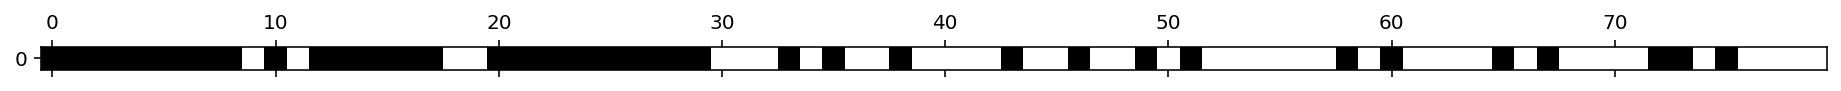

In [23]:
#시각화 
mask = select.get_support() #특성중에 선택 된것을 확인하는 True 로 표시 
plt.matshow(mask.reshape(1,-1),cmap = 'gray_r')
plt.yticks([0])
plt.show()

In [24]:
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)
print()
print()

(284, 80) (284,)
(285, 80) (285,)




In [25]:
from sklearn.linear_model import LogisticRegression
#모델을 학습할떄 선택 된 모델을 학습한다
train_x_select = select.transform(train_x)
test_x_select = select.transform(test_x)

#전체 특성을 사용한 학습 
model = LogisticRegression(solver = 'liblinear')
model.fit(train_x_select,train_y)

print(model.score(train_x_select,train_y),model.score(test_x_select,test_y))


0.9788732394366197 0.9403508771929825


In [26]:
model = LogisticRegression()
model.fit(train_x,train_y)
print(model.score(train_x,train_y),model.score(test_x,test_y))

0.9823943661971831 0.9157894736842105


## 모델 기반 선택 
- 지도 학습 머신러닝 모델을 사용하여 특성의 중요도를 평가해서 가장 중요한 것만 선택

- 지도학습 모델은 최종적으로 사용할 학습 모델과 같을 필요는 없음

- 특성 선택을 위한 모델은 각 특성의 중요도를 측정하여 순서 매길 수 있어야 함

- 결정트리 기반의 모델들은 각 특성의 중요도를 feature_importances_에 저장

  class sklearn.feature_selection.SelectFromModel(estimator, *, threshold=None, prefit=False, norm_order=1, max_features=None, importance_getter='auto')[source]¶

estimator = 사용할 머신러닝 모델 

threshold = 임계값으로 특성을 고를때 임계값보다 같거나 높은것은 유지 아니면 버림 

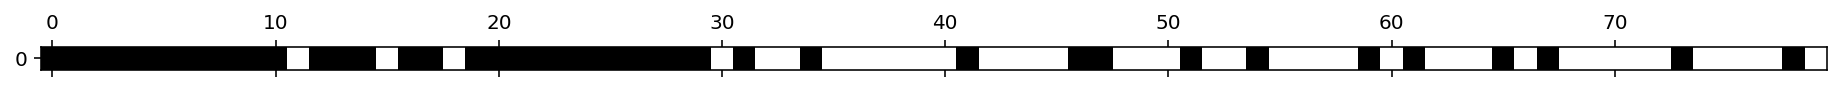

In [27]:
from sklearn.feature_selection import SelectFromModel #model 기반 특성 선택 라이브러리 
from sklearn.ensemble import RandomForestClassifier

select = SelectFromModel(estimator=RandomForestClassifier(random_state=0),threshold='median')
'''
estimator = 사용할 머신러닝 모델 

threshold = 임계값으로 특성을 고를때 임계값보다 같거나 높은것은 유지 아니면 버림 
'''
#학습
select.fit(train_x,train_y)

#선택된 
mask = select.get_support()
plt.matshow(mask.reshape(1,-1),cmap = 'gray_r')
plt.yticks([0])
plt.show()

In [28]:
print(pd.DataFrame(mask).value_counts()) #반반 씩 선택 
print(train_x.shape,train_y.shape)
print(test_x.shape,test_y.shape)

True     40
False    40
dtype: int64
(284, 80) (284,)
(285, 80) (285,)


In [29]:
#중요한 특성만 학습 
train_x_l1 = select.transform(train_x)
test_x_l1 = select.transform(test_x)

model = LogisticRegression(solver = 'liblinear')
model.fit(train_x_l1,train_y)
model.score(test_x_l1,test_y)

0.9508771929824561

### 반복적 특성 선택(iterative selection)

- 특성의 수가 각기 다른 모델에서 만들어짐

- 방법

  1. 특성을 하나도 선택하지 않은 상태로 시작해 어떤 종료 조건을 도달할 때까지 하나씩 추가하는 방법
  2. 모든 특성을 가지고 시작해 어떤 종료 조건이 될 때까지 하나씩 제거하는 방법

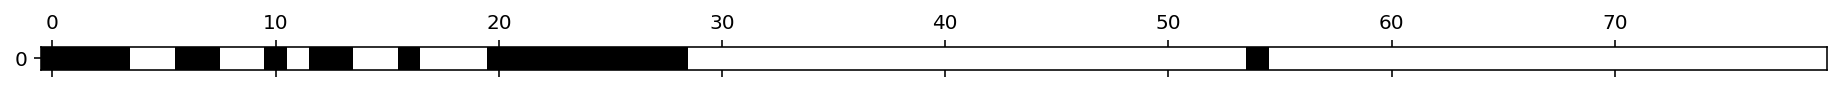

In [30]:
from sklearn.feature_selection import RFE
select = RFE(estimator = RandomForestClassifier(random_state=0),n_features_to_select=20) #특성이 20개가 될때까지 모든 특성에서 중요하지 않은 특성을 반복해서 하나씩 뺀다
select.fit(train_x,train_y)
mask = select.get_support()

plt.matshow(mask.reshape(1,-1),cmap = 'gray_r')
plt.yticks([0])
plt.show()

In [31]:
from sklearn.linear_model import LogisticRegression

train_x_ref = select.transform(train_x)
test_x_ref = select.transform(test_x)
model = LogisticRegression(solver = 'liblinear')

model.fit(train_x_ref,train_y)
model.score(test_x_ref,test_y)

0.9614035087719298

## 실습 자전거 대여 기록 

In [32]:
!apt -qq -y install fonts-nanum
 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
 
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
fm._rebuild()
 
# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'
 
# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


In [33]:
# 2015년 8월 데이터 세 시간 간격 일일 주요 경향
import mglearn

citibike = mglearn.datasets.load_citibike()
type(citibike)
citibike.head()

starttime
2015-08-01 00:00:00     3
2015-08-01 03:00:00     0
2015-08-01 06:00:00     9
2015-08-01 09:00:00    41
2015-08-01 12:00:00    39
Freq: 3H, Name: one, dtype: int64

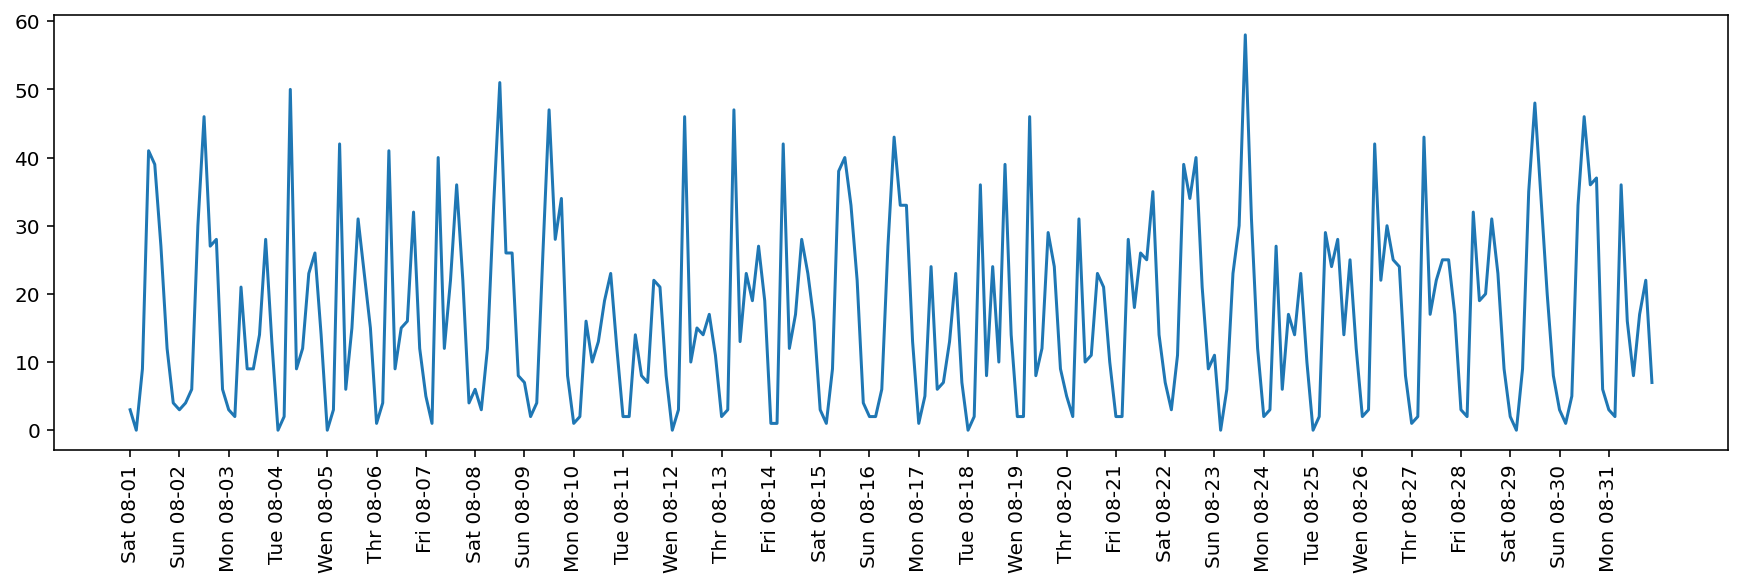

In [34]:
# 8월 한 달 동안의 대여 횟수
import pandas as pd

xticks = pd.date_range(start=citibike.index.min(), end=citibike.index.max())
week = ['Sun','Mon','Tue','Wen','Thr','Fri','Sat']
xticks_name = [ week[int(w)]+d for w, d in zip(xticks.strftime('%w'), xticks.strftime(' %m-%d')) ]

plt.figure(figsize=(15, 4))
plt.plot(citibike)
plt.xticks(xticks, labels=xticks_name, rotation=90)
plt.show()

##훈련 세트 테스트 세트 나누기 

- 시계열 데이터를 이용한 예측 작업은 과거 데이터에서 학습하여 미래를 예측하는 방식
- 어떤 날짜를 기준으로 훈련 세트와 테스트 세트를 나눔 섞으면 안됌

In [35]:
# 3시간 누적 카운트 이므로 하루 24/3=8 개씩 23일 치는 184개 8일 치는 64개
# 처음 184개 데이터 포인트를 훈련 세트로 사용하고 나머지는 테스트 세트로 사용
n_train = 184

# 주어진 특성을 사용하여 평가하고 그래프를 만듬
def eval_on_features(features, target, regressor):
    # 훈련 세트와 테스트 세트로 나눔
    X_train, X_test = features[:n_train], features[n_train:]
    y_train, y_test = target[:n_train], target[n_train:]
    
    regressor.fit(X_train, y_train)
    print("테스트 세트 R^2: {:.2f}".format(regressor.score(X_test, y_test))) 
    
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))

    plt.xticks(range(0, len(x), 8), xticks_name, rotation=90, ha="left")

    plt.plot(range(n_train), y_train, label="train")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="test")
    plt.plot(range(n_train), y_pred_train, '--', label="train predict")

    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--', label="test predict")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("date")
    plt.ylabel("rental number")

In [36]:
# 타깃값 추출 (대여 횟수)
y = citibike.values

# POSIX 시간 : 1970/1/1 00:00:00 부터 초로 나타냄
# POSIX 시간을 10**9로 나누어 변환
X = citibike.index.astype('int64').values.reshape(-1, 1) // 10**9

테스트 세트 R^2: -0.04


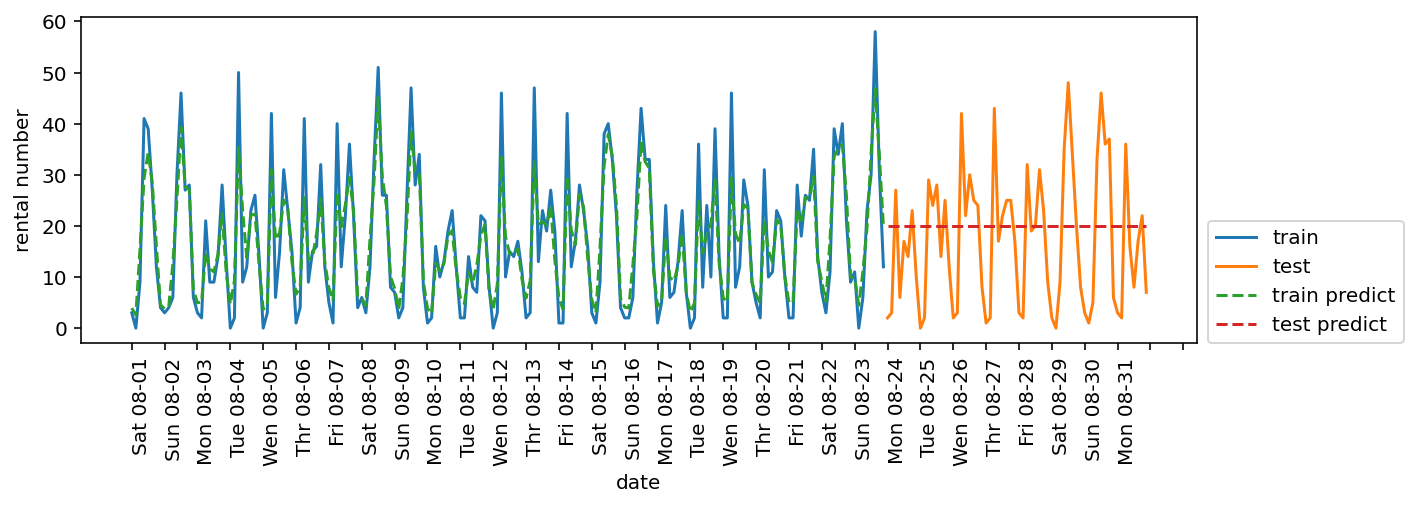

In [37]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=0)
eval_on_features(X, y, model)

테스트 세트 R^2: 0.60


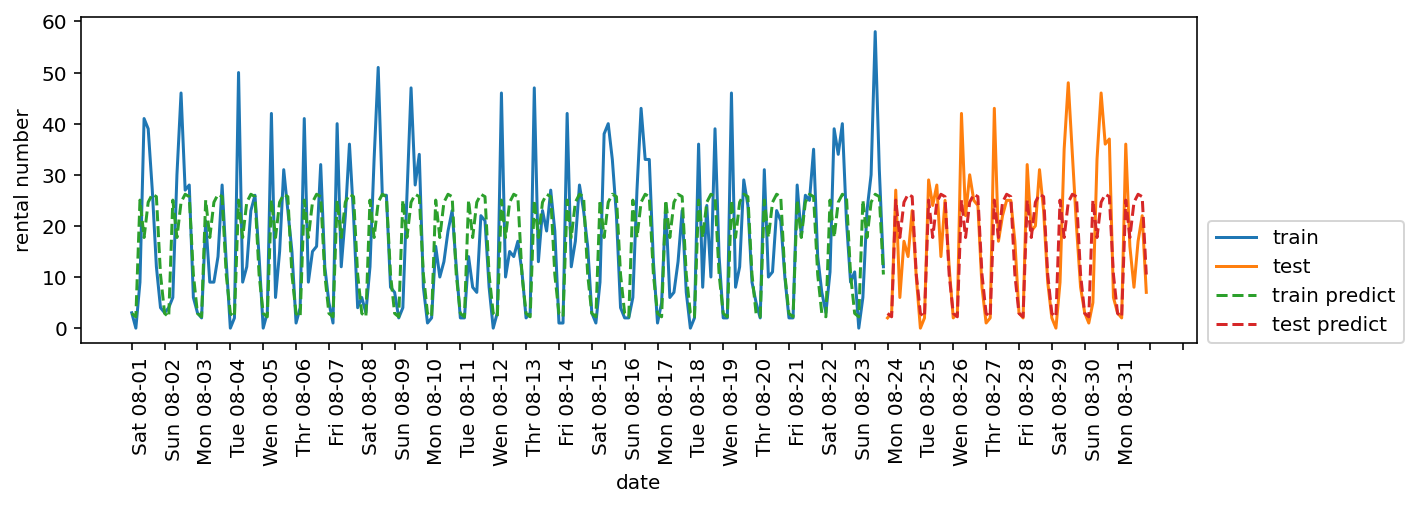

In [38]:
# 시간 정보 추가
hour_x = citibike.index.hour.values.reshape(-1,1)
eval_on_features(hour_x,y,model)

테스트 세트 R^2: 0.02


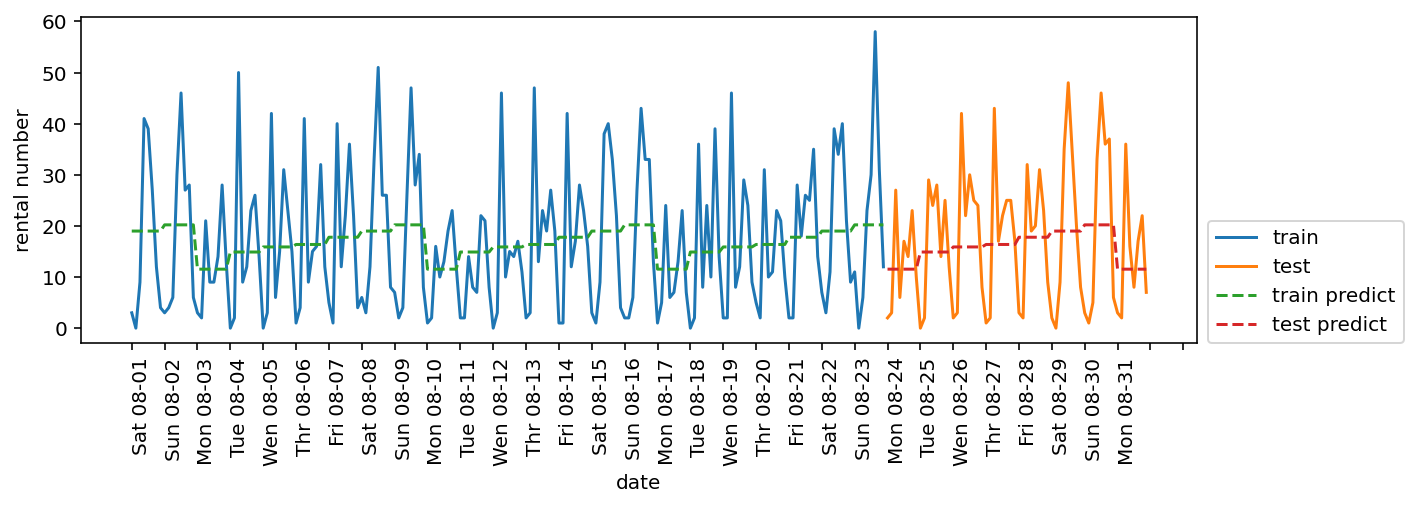

In [39]:
# 요일 정보도 추가
week_x = citibike.index.dayofweek.values.reshape(-1,1)
eval_on_features(week_x , y,model)

테스트 세트 R^2: 0.84


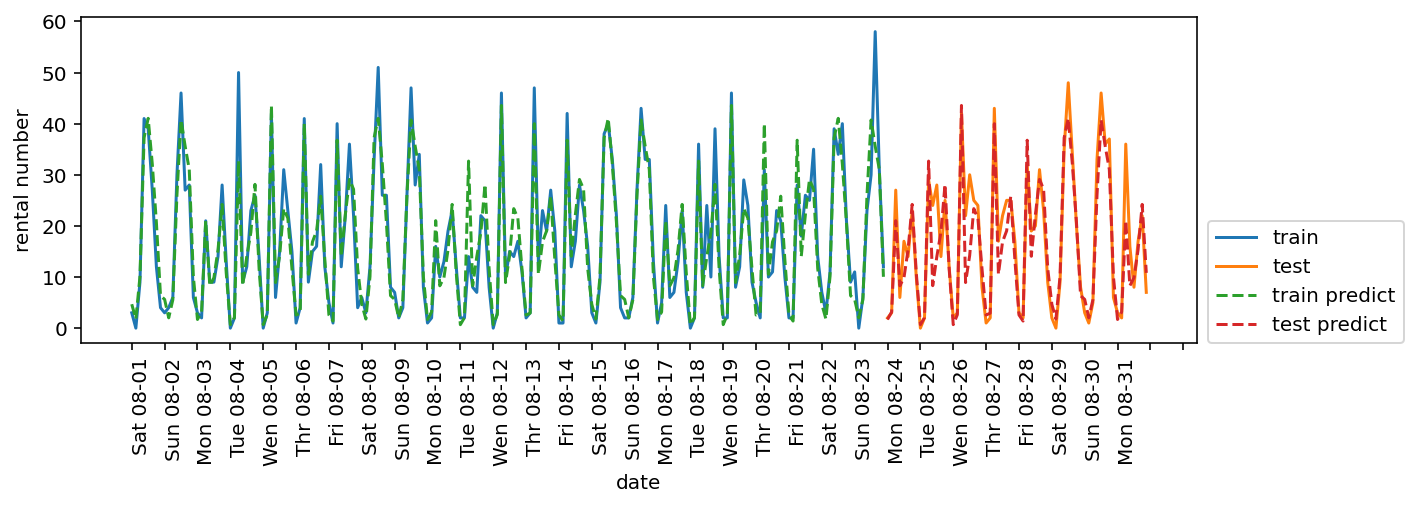

In [40]:
hour_week_x = np.hstack([week_x,hour_x])
eval_on_features(hour_week_x,y,model)

테스트 세트 R^2: 0.13


'\n하루를 8개로 구분한 데이터 \n0 ,3 ,6, 9, .....21 연속형 데이터로 보면 값이 큰게 더 잘나온다. \n'

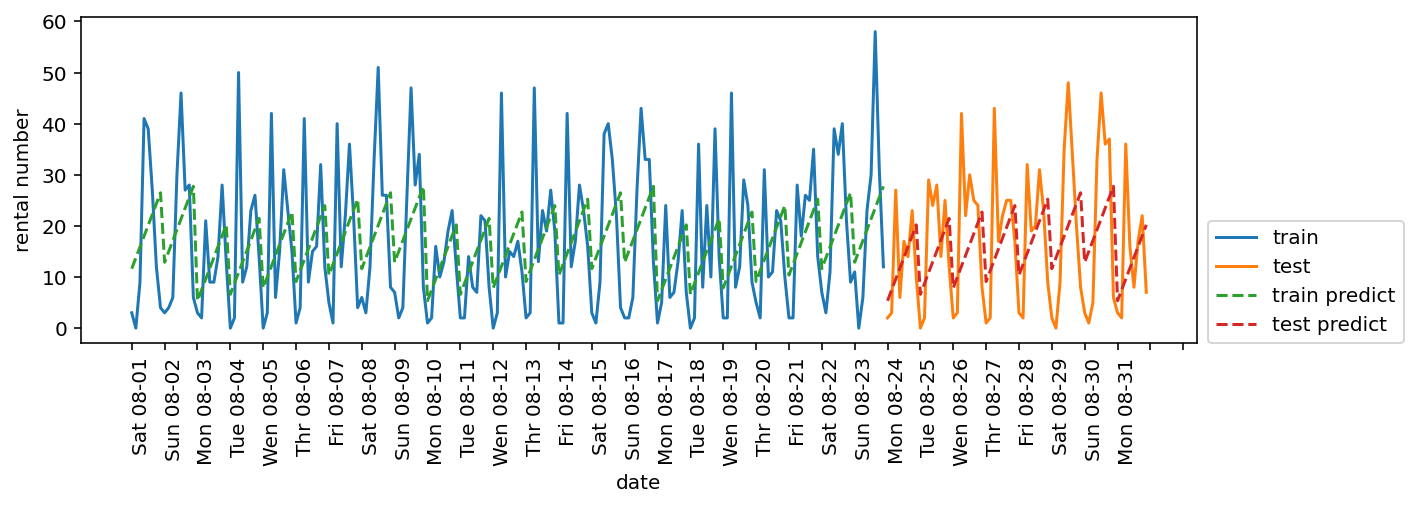

In [41]:
# LinearRegression 을 적용
# 굳이 랜덤 포레스트같이 복잡한 모델이 필요하지 않음
from sklearn.linear_model import LinearRegression
model = LinearRegression()
eval_on_features(hour_week_x,y,LinearRegression()) #0 에서 시작해서 21 에서 끝난다 
'''
하루를 8개로 구분한 데이터 
0 ,3 ,6, 9, .....21 연속형 데이터로 보면 값이 큰게 더 잘나온다. 
'''

In [42]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
hour_week_x_oh = encoder.fit_transform(hour_week_x).toarray()
hour_week_x_oh.shape

'''
하루는 8개의 시간  / 요일 일 ~~ 토 : 7일 해서 특성이 15개
'''
hour_week_x_oh.shape

(248, 15)

테스트 세트 R^2: 0.62


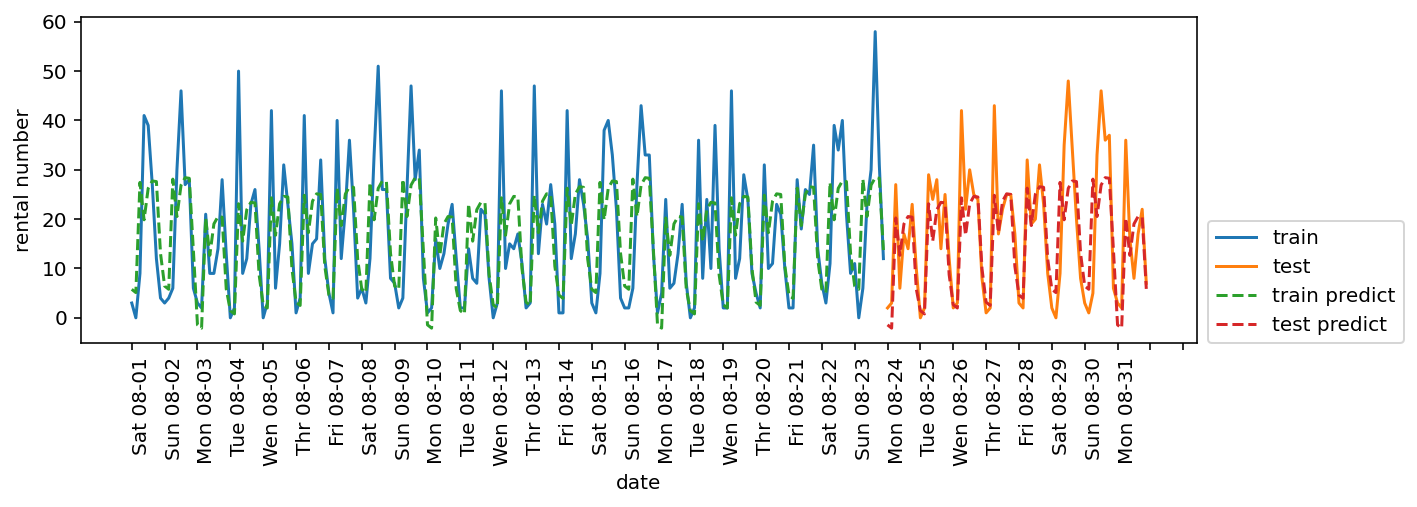

In [43]:
#Ridge 이용 
from sklearn.linear_model import Ridge
model = Ridge()
eval_on_features(hour_week_x_oh,y,model)

In [44]:
#상호 작용 특성 
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2 ,interaction_only= True,include_bias=False)
hour_week_x_oh_poly = poly.fit_transform(hour_week_x_oh)
hour_week_x_oh_poly.shape

(248, 120)

테스트 세트 R^2: 0.85


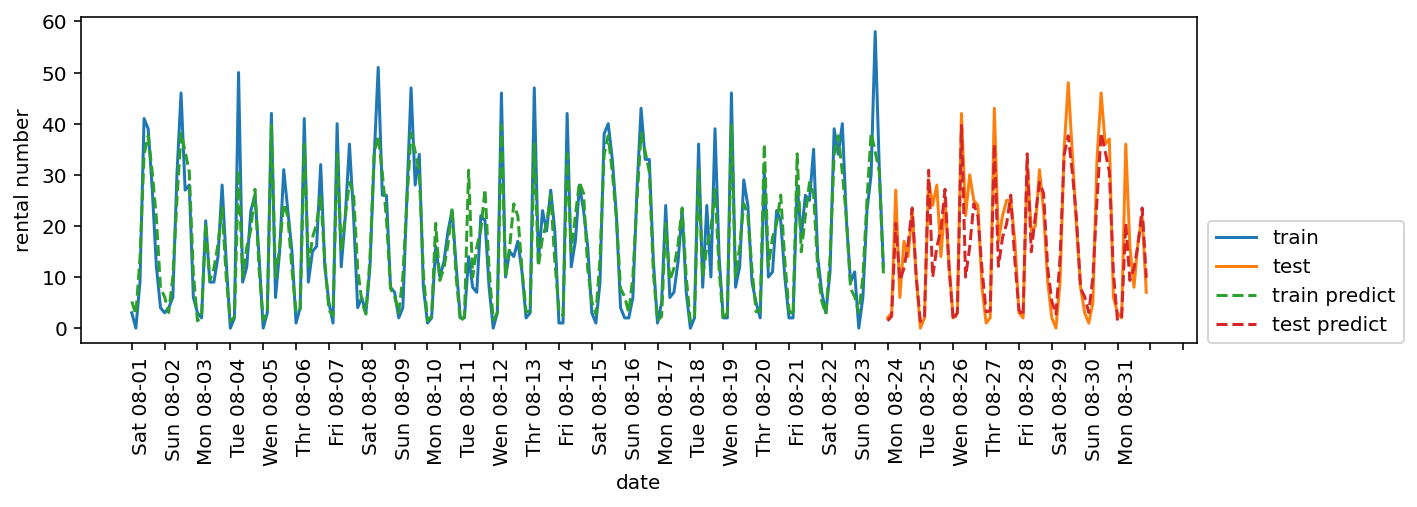

In [45]:
lr = Ridge()
eval_on_features(hour_week_x_oh_poly,y,lr)

## 특성 공학 실습 02

캐글 주택 가격

- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

- 문제 : 주택 판매 가격 예측 


### 데이터 사전 처리(Preprocessing)

In [46]:
# 구글드라이브 연동
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

# 구글 드라이브 파일 확인
!ls '/gdrive/My Drive/temp/'

# 반복되는 드라이브 경로 변수화
drive_path = '/gdrive/My Drive/temp/'

Mounted at /gdrive
 매수종목1.txt		   ml_class.png		   stock-data.csv
 매수종목2.txt		   pca_1.png		  'stock price.xlsx'
 adult.data		   pca_2.png		  'stock valuation.xlsx'
 auto-mpg.csv		   pca_3.png		   test.db.db
 bmi_500.csv		   Picture1.png		   test.txt
 citibike.csv		   population_number.csv   text.txt
 매수종목.csv		   ram_price.csv	   ThoraricSurgery.csv
 data_mine.csv		   ratings_small.txt	   titanic.xls
 data_population.csv	   ratings_test.txt	   tmdb_5000_credits.csv
 data_studentlist_en.csv   ratings_train.txt	   tmdb_5000_movies.csv
 demo.docx		   sample1.pdf		   Traffic_Accident_2017.csv
 diabetes.csv		   sample2.pdf		   train.csv
 example.docx		   sample.docx		   user_id_mean.csv
 height_weight.txt	   sample_merge.pdf	   wine.csv
 HelloWorld.xlsx	   sample.xlsx		   주가데이터.xlsx
 house_price.csv	   score.csv		   남북한발전전력량.xlsx
 lenna.png		   seoul.html
 little-char.png	   sonar.csv


In [47]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv(drive_path + 'house_price.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [48]:
# Id와 너무 많은 결측치를 가지고 있는 특성 삭제
df.drop( ['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'],
        axis=1, inplace=True)

In [49]:
df.shape

(1460, 75)

In [50]:
df.fillna(df.mean(),inplace=True)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

In [52]:
df_oh = pd.get_dummies(df)
df.shape, df_oh.shape

((1460, 75), (1460, 271))

In [53]:
def get_rmse(model):
    pred = model.predict(test_x)
    mse = mean_squared_error(test_y , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

In [54]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
x = df_oh.iloc[:,:-1]
y = df_oh.iloc[:,-1:]


train_x,test_x,train_y,test_y = train_test_split(x,y,random_state = 42)

model_lr = LinearRegression().fit(train_x,train_y)
print(model_lr.score(train_x,train_y),model_lr.score(test_x,test_y))

model_r = Ridge(max_iter=1000).fit(train_x,train_y)
print(model_r.score(train_x,train_y),model_r.score(test_x,test_y))

model_l = Lasso(alpha = 0.001).fit(train_x,train_y)
print(model_l.score(train_x,train_y),model_l.score(test_x,test_y))

model_rf = RandomForestRegressor(random_state=0).fit(train_x,train_y)
print(model_rf.score(train_x,train_y),model_rf.score(test_x,test_y))


get_rmses([model_lr,model_r,model_l,model_rf])

'''
LinearRegression 로그 변환된 RMSE: 0.0 
Ridge 로그 변환된 RMSE: 0.058 -> Ridge 가 가장 좋은 모델임을 알수 있다. 
Lasso 로그 변환된 RMSE: 0.074
RandomForestRegressor 로그 변환된 RMSE: 0.076
'''

1.0 1.0
0.9945875545582638 0.9610166628176126
0.9881140662483119 0.9366979945029134
0.9990387728026535 0.9338228138528138
LinearRegression 로그 변환된 RMSE: 0.0
Ridge 로그 변환된 RMSE: 0.058
Lasso 로그 변환된 RMSE: 0.074
RandomForestRegressor 로그 변환된 RMSE: 0.076


'\nLinearRegression 로그 변환된 RMSE: 0.0 \nRidge 로그 변환된 RMSE: 0.058 -> Ridge 가 가장 좋은 모델임을 알수 있다. \nLasso 로그 변환된 RMSE: 0.074\nRandomForestRegressor 로그 변환된 RMSE: 0.076\n'

In [55]:
from sklearn.model_selection import cross_val_score
models  = [model_lr,model_r,model_l,model_rf]

for model in models:
  mse_list = -1 * cross_val_score(model,x,y,scoring = 'neg_mean_squared_error',cv = 5)
  rmse_list = np.sqrt(mse_list)
  rmse_avg = rmse_list.mean()
  print(f'{model.__class__.__name__} CV RMSE list: {np.round(rmse_list, 3)}')
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse_avg:.3f}')


LinearRegression CV RMSE list: [0. 0. 0. 0. 0.]
LinearRegression CV RMSE AVG: 0.000
Ridge CV RMSE list: [0.043 0.025 0.041 0.041 0.016]
Ridge CV RMSE AVG: 0.033
Lasso CV RMSE list: [0.058 0.013 0.058 0.057 0.01 ]
Lasso CV RMSE AVG: 0.039
RandomForestRegressor CV RMSE list: [0.059 0.028 0.06  0.063 0.011]
RandomForestRegressor CV RMSE AVG: 0.044


## 하이퍼파리미터 튜닝 

In [56]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model,params):
  grid_search = GridSearchCV(model,param_grid = params , scoring = 'neg_mean_squared_error',cv = 5)
  grid_search.fit(x,y)

  rmse = np.sqrt(-1*grid_search.best_score_)
  print(f'{model.__class__.__name__} CV RMSE AVG: {rmse:.3f},',
        f' Params: {grid_search.best_params_}')
  return grid_search.best_estimator_


In [57]:
param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
print_best_params(model_r, param_ridge)
print_best_params(model_l, param_lasso)

Ridge CV RMSE AVG: 0.007,  Params: {'alpha': 0.05}
Lasso CV RMSE AVG: 0.045,  Params: {'alpha': 0.001}


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [60]:
lr_reg = LinearRegression().fit(train_x,train_y)
ridge_reg = Ridge(alpha=12).fit(train_x,train_y)
lasso_reg = Lasso(alpha=0.001).fit(train_x,train_y)

get_rmses( [lr_reg, ridge_reg, lasso_reg] )

LinearRegression 로그 변환된 RMSE: 0.0
Ridge 로그 변환된 RMSE: 0.077
Lasso 로그 변환된 RMSE: 0.074


[2.0658476374445186e-09, 0.07725157904512919, 0.07408100446337952]

- 데이터 왜곡 로그 변환후 성능 평가

In [61]:
from scipy.stats import skew #데이터의 기울어진 정도

f_index = df.dtypes[ df.dtypes != 'object' ].index #df 중에 object 타입이 아닌 즉 연속형 변수를 변환해야 한다

skew_features = df[f_index].apply(lambda x : skew(x)) #특성의 기울어진 정도를 저장

skew_features_top = skew_features[ skew_features > 1 ] 
skew_features_top.sort_values(ascending=False)

MiscVal          24.451640
PoolArea         14.813135
LotArea          12.195142
3SsnPorch        10.293752
LowQualFinSF      9.002080
KitchenAbvGr      4.483784
BsmtFinSF2        4.250888
ScreenPorch       4.117977
BsmtHalfBath      4.099186
EnclosedPorch     3.086696
MasVnrArea        2.673661
LotFrontage       2.382499
OpenPorchSF       2.361912
SalePrice         1.880941
BsmtFinSF1        1.683771
WoodDeckSF        1.539792
TotalBsmtSF       1.522688
MSSubClass        1.406210
1stFlrSF          1.375342
GrLivArea         1.365156
dtype: float64

In [62]:
df[skew_features_top.index] = np.log1p(df[skew_features_top.index])

In [63]:
df_oh = pd.get_dummies(df)
print( df.shape, df_oh.shape )

X = df_oh.drop('SalePrice', axis=1)
y = df_oh['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=42)

param_ridge = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
param_lasso = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
print_best_params(model_r, param_ridge)
print_best_params(model_l, param_lasso)

(1460, 75) (1460, 271)
Ridge CV RMSE AVG: 0.084,  Params: {'alpha': 5}
Lasso CV RMSE AVG: 0.088,  Params: {'alpha': 0.001}


Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)